# Graphs

In [222]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib import colors
from matplotlib.ticker import PercentFormatter

## Global Values

In [239]:
NUMBER_TORNADOS = 108 #Number of Tornados
NUMBER_DAYS = 57 #Number of days of data per Tornado
FILE_NAME = "historical_data_fin.csv"

## Loading Data

In [240]:
#Field 0: 'datatime'
#Field 1: 'temperature'
#Field 2: 'windspeed'
#Field 3: 'surface solar radiation'
#Field 4: 'relative humidity'
#Field 5: 'surface pressure'
#Field 6: 'total precipitation'
#Field 7: 'latitude'
#Field 8: 'longitude'


data = pd.read_csv (FILE_NAME,header=None)

#Take data to numPy
numData = data.to_numpy()


## Helper functions

In [241]:
def getAllDataByField(field): 
    
    return numData[1:,field:field+1]

#Returns elements of a given field (0-8) for a particular event (0-107)
def getDataByFieldAndIndex(field, event):
    
    return numData[1+(NUMBER_DAYS*event):(NUMBER_DAYS*(event+1)+1),field:field+1]



#### Sample Data Graph
##### Temperature leading to Tornado 0

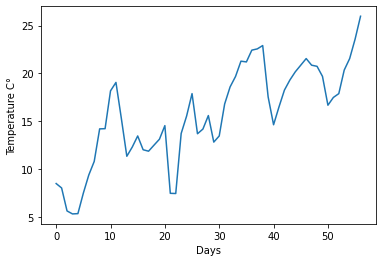

In [242]:
plt.ylabel("Temperature C°")
plt.xlabel("Days")
plt.plot(np.arange(NUMBER_DAYS),getDataByFieldAndIndex(1,0).astype(np.float).flatten())

plt.show()

## Temperature

### Linear graph of Temperature for all Tornados

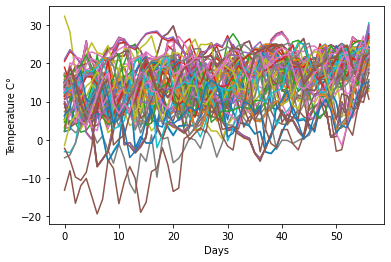

In [243]:
plt.ylabel("Temperature C°")
plt.xlabel("Days")

for i in range(NUMBER_TORNADOS):
    plt.plot(np.arange(NUMBER_DAYS),getDataByFieldAndIndex(1,i).astype(np.float).flatten())
plt.show()


### Linear graph of Net Temperatures for all Tornados

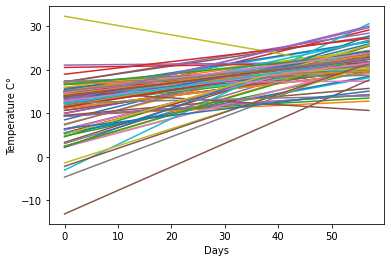

In [244]:
plt.ylabel("Temperature C°")
plt.xlabel("Days")

for i in range(NUMBER_TORNADOS):
    plt.plot([0,NUMBER_DAYS],[getDataByFieldAndIndex(1,i).astype(np.float).flatten()[0],getDataByFieldAndIndex(1,i).astype(np.float).flatten()[NUMBER_DAYS-1]])
plt.show()

### Mean and Median of Temperatures across all Tornados 

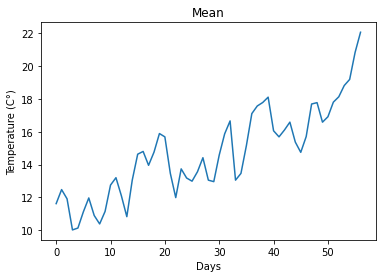

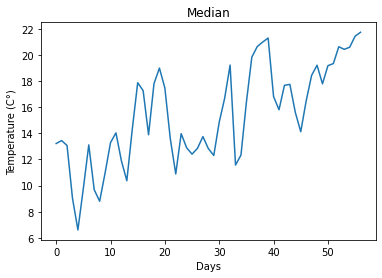

In [253]:
#Reshape array into 2D
arr2d = np.reshape(getAllDataByField(1), (-1, NUMBER_DAYS)).astype(np.float)

#Mean
arrmean = np.mean(arr2d,axis=0)
plt.plot(np.arange(NUMBER_DAYS),arrmean)
plt.title("Mean")
plt.ylabel("Temperature (C°)")
plt.xlabel("Days")
plt.show()

#Median
arrmedian = np.median(arr2d,axis=0)
plt.plot(np.arange(NUMBER_DAYS),arrmedian)
plt.title("Median")
plt.ylabel("Temperature (C°)")
plt.xlabel("Days")
plt.show()

### Net Positive Temperatures vs Net Negative Temperatures

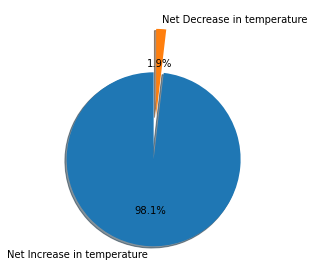

In [254]:
labels = ['Net Increase in temperature','Net Decrease in temperature']
sizes = [0,0]
explode = (.5,0)

for i in range(NUMBER_TORNADOS):
    
    #If temperature increased approaching day of Tornado
    if(getDataByFieldAndIndex(1,i).astype(np.float).flatten()[NUMBER_DAYS-1] - getDataByFieldAndIndex(1,i).astype(np.float).flatten()[0] > 0):
        sizes[0] += 1
    else:
        sizes[1] += 1

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()
        

## Wind

### Linear graph of Wind speeds for all Tornados

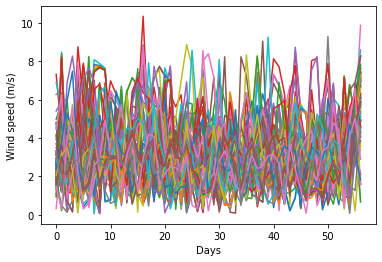

In [255]:
plt.ylabel("Wind speed (m/s)")
plt.xlabel("Days")

for i in range(NUMBER_TORNADOS):
    plt.plot(np.arange(NUMBER_DAYS),getDataByFieldAndIndex(2,i).astype(np.float).flatten())
    
plt.show()

### Linear graph of Net speeds for all Tornados

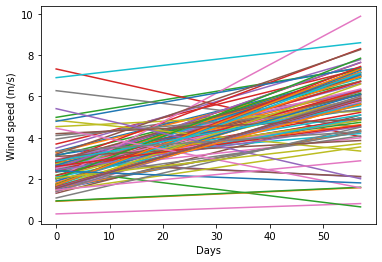

In [256]:
plt.ylabel("Wind speed (m/s)")
plt.xlabel("Days")

for i in range(NUMBER_TORNADOS):
    plt.plot([0,NUMBER_DAYS],[getDataByFieldAndIndex(2,i).astype(np.float).flatten()[0],getDataByFieldAndIndex(2,i).astype(np.float).flatten()[NUMBER_DAYS-1]])
plt.show()

### Mean and Median of Wind Speeds across all Tornados 

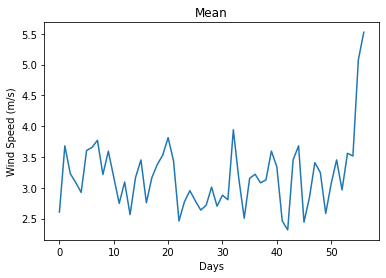

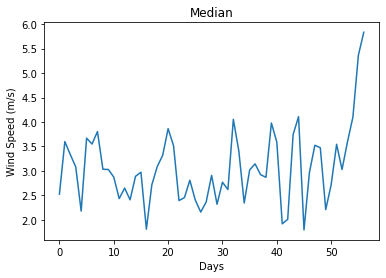

In [257]:
#Reshape array into 2D
arr2d = np.reshape(getAllDataByField(2), (-1, NUMBER_DAYS)).astype(np.float)

#Mean
arrmean = np.mean(arr2d,axis=0)
plt.plot(np.arange(NUMBER_DAYS),arrmean)
plt.title("Mean")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Days")
plt.show()

#Median
arrmedian = np.median(arr2d,axis=0)
plt.plot(np.arange(NUMBER_DAYS),arrmedian)
plt.title("Median")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Days")
plt.show()

### Net Positive speeds vs Net Negative speeds

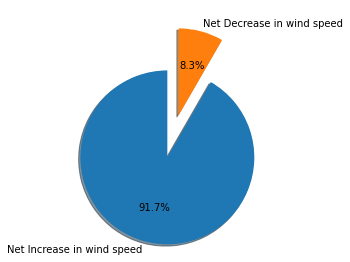

In [258]:
labels = ['Net Increase in wind speed','Net Decrease in wind speed']
sizes = [0,0]
explode = (.5,0)

for i in range(NUMBER_TORNADOS):
    
    #If temperature increased approaching day of Tornado
    if(getDataByFieldAndIndex(2,i).astype(np.float).flatten()[NUMBER_DAYS-1] - getDataByFieldAndIndex(2,i).astype(np.float).flatten()[0] > 0):
        sizes[0] += 1
    else:
        sizes[1] += 1

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()